#### Data Processing with Python

In [1]:
import pandas as pd
import numpy as np

<hr>
###### IN CASE OF PROBLEMS IMPORTING PACKAGES


In [ ]:
# SOLUTION A: select this cell and type Shift-Enter to execute the code below.

%conda install numpy xlrd pandas seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

In [ ]:
# SOLUTION B: select this cell and type Shift-Enter to execute the code below.

%pip install numpy xlrd pandas seaborn

# Now restart the kernel (Menu -> Kernel -> Restart Kernel)

<hr>

Run the following cell to rebuild the three `DataFrames` from the last notebook:

In [3]:
# countries
countries = pd.read_excel(
    "../assets/data_geographies_v1.xlsx", sheet_name="list-of-countries-etc"
)

# co2
data = pd.read_csv("../assets/yearly_co2_emissions_1000_tonnes.csv")
co2 = data.melt(id_vars=["country"], var_name="year", value_name="kt")
co2.dropna(inplace=True)
co2["year"] = co2["year"].astype(int)

# stats97
data = pd.read_csv("../assets/stats_1997.csv", header=None)
df = data[0].str.split("-", expand=True)
df.columns = ["geo", "statistic"]
df["value"] = data[1]
stats97 = df.pivot(index="geo", columns="statistic", values="value")


# 4. Visualising Data

Having loaded and tidied some data, a sensible next step is to visualise the distributions of variables to check for any issues.

[Matplotlib](https://matplotlib.org) is the base graphics library in python. Although it has many useful plotting functions, in this session we will focus on making plots using another package called [seaborn](https://seaborn.pydata.org). This is another set of functions, built on top of matplotlib, that support a consistent approach to data visualisation, and integrate well with the pandas data structures. 

We need to import both matplotlib and seaborn:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# some adjustments to the default image resolution
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (4.5, 2.5)
plt.rc("savefig", dpi=150)


Seaborn makes it much easier to create high-quality graphics in python for presentations and publications.

The following commands override the matplotlib defaults with the chosen seaborn style, so that any plots produced by matplotlib will have the seaborn styling:

In [5]:
sns.set()
sns.set_style("darkgrid")


## 4.1 Histogram

Let's start with a histogram for the GDP data from `stats97`.

The DataFrame actually has a set of built-in methods for plotting, which call the matplotlib functions. e.g.:

array([[<AxesSubplot:title={'center':'gdp'}>]], dtype=object)

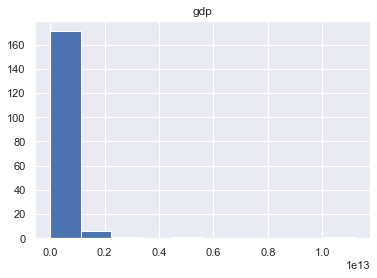

In [6]:
stats97.hist("gdp")

The seaborn version of a histogram is called [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot). 

It is a bit fancier than matplotlib's:

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


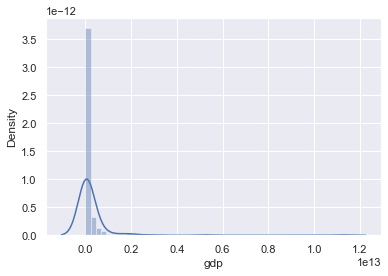

In [7]:
sns.distplot(stats97["gdp"])
plt.show()


The extra line plot is a [kernel density estimate](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation) (KDE), which is sometimes nice for visualising probability distributions. 

If we don't want it, we can turn it off:

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


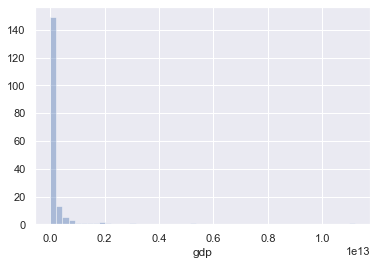

In [8]:
sns.distplot(stats97["gdp"], kde=False)
plt.show()


The data are highly positively skewed, so let's take a log of the data using the numpy function `log10`.

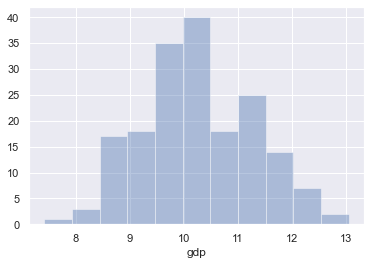

In [9]:
sns.distplot(np.log10(stats97["gdp"]), kde=False)
plt.show()


Keyword arguments to the seaborn functions control the aesthetics:

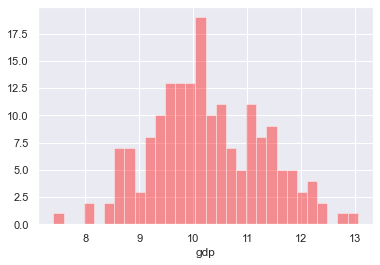

In [10]:
sns.distplot(np.log10(stats97["gdp"]), kde=False, bins=30, color="red")
plt.show()


The seaborn function returns a matplotlib `axis` object, which we can use to set titles etc:

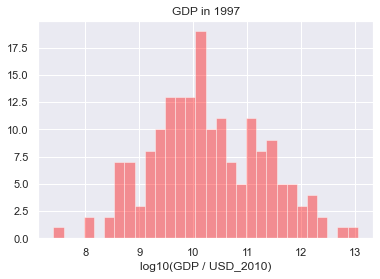

In [11]:
ax = sns.distplot(np.log10(stats97["gdp"]), kde=False, bins=30, color="red")
ax.set_title("GDP in 1997")
ax.set_xlabel("log10(GDP / USD_2010)")
plt.show()


##### *Exercise*
Make a similar histogram for 1997 population. Make it a different colour.

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


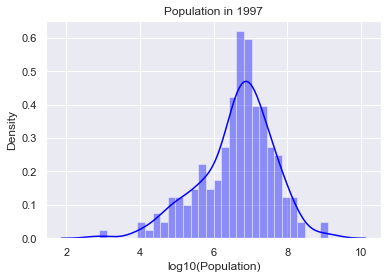

In [14]:
ax = sns.distplot(np.log10(stats97["pop"]), kde=True, bins=30, color="blue")
ax.set_title("Population in 1997")
ax.set_xlabel("log10(Population)")
plt.show()


### Saving plots to file

We can save a plot to a file like so:

In [17]:
fig = ax.get_figure()
fig.savefig("../assets/population.pdf", bbox_inches="tight")


The file type is determined by the file extension.

## Box plot

The same distribution can be summarised using the `boxplot()` function:


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp'>

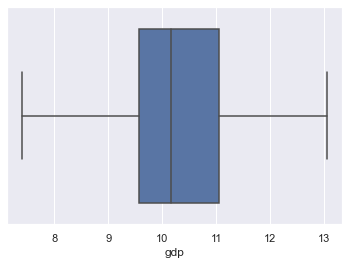

In [18]:
sns.boxplot(np.log10(stats97["gdp"]))


## Violin plot

The `violinplot()` function gives a similar but more informative view:


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp'>

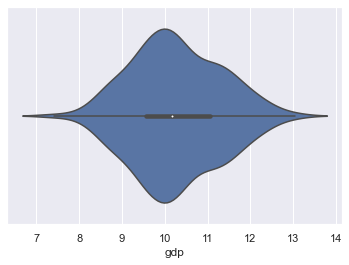

In [19]:
sns.violinplot(np.log10(stats97["gdp"]))


## Scatter plot

We can visualise covariation between variables using a scatter plot, for example GDP vs population. This uses `relplot()`:


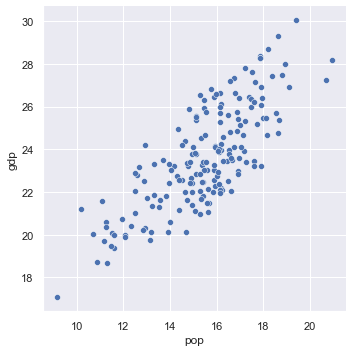

In [20]:
sns.relplot(x="pop", y="gdp", data=np.log(stats97))


Using the `jointplot()` function, we can use the KDE to visualise this joint distribution in more detail:

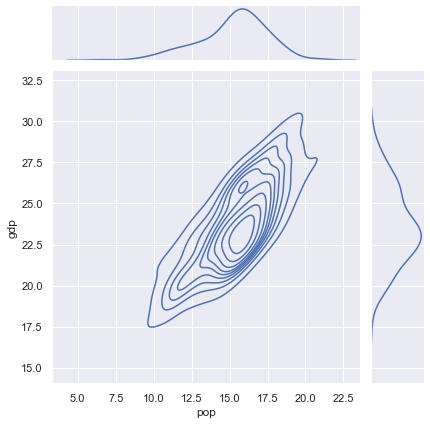

In [21]:
sns.jointplot(x="pop", y="gdp", data=np.log(stats97), kind="kde")


## Derived variables

It might be more useful to compare countries' GDP on a per-capita basis. We need to make a new variable to show per-capita GDP. 

To do this, we will add a new column to the `DataFrame`.

##### *Exercise*

1. Add GDP per person (**gdp_pp**) as a new column of `stats97`.

2. Visualise the distribution of **gdp_pp**.


In [22]:
stats97

statistic,gdp,pop
geo,,
afg,NaN,18400000.0
ago,2.570000e+10,15100000.0
alb,5.470000e+09,3090000.0
and,2.400000e+09,64300.0
are,1.730000e+11,2700000.0
...,...,...
wsm,4.330000e+08,172000.0
yem,1.740000e+10,16400000.0
zaf,2.490000e+11,43700000.0


In [24]:
stats97["gdp_pp"] = stats97["gdp"] / stats97["pop"]
stats97

statistic,gdp,pop,gdp_pp
geo,,,
afg,NaN,18400000.0,NaN
ago,2.570000e+10,15100000.0,1701.986755
alb,5.470000e+09,3090000.0,1770.226537
and,2.400000e+09,64300.0,37325.038880
are,1.730000e+11,2700000.0,64074.074074
...,...,...,...
wsm,4.330000e+08,172000.0,2517.441860
yem,1.740000e+10,16400000.0,1060.975610
zaf,2.490000e+11,43700000.0,5697.940503


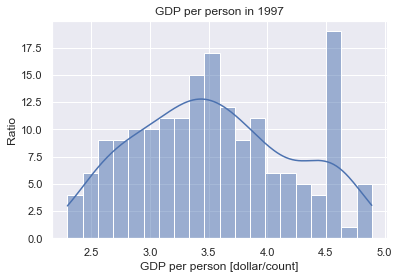

In [32]:
ax = sns.histplot(np.log10(stats97["gdp_pp"]), kde=True, bins=20)
ax.set_title("GDP per person in 1997")
ax.set_xlabel("GDP per person [dollar/count]")
ax.set_ylabel("Ratio")
plt.show()


## Line plot

##### *Exercise*

Starting with the `co2` dataframe, plot the annual emissions of a country of your choice.

*Hint*: use the `lineplot()` function.


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


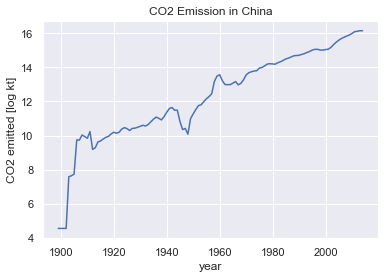

In [35]:
data = co2.query('country == "China"')
ax = sns.lineplot(data["year"], np.log(data["kt"]))
ax.set_title("CO2 Emission in China")
ax.set_ylabel("CO2 emitted [log kt]")
plt.show()
